<a href="https://colab.research.google.com/github/reshmapalagiri-ds/-Uncovering-Hidden-Patterns-in-Geyser-Eruptions-Using-K-Means-Clustering/blob/main/k_means_geyser_eruption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

Step 1: Read the data

In [ ]:
df = pd.read_csv("/content/faithful.csv")
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


Step 2: Data cleaning

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.isnull().sum()

,0
eruptions,0
waiting,0


In [ ]:
df.dtypes
df = df.drop_duplicates()

In [ ]:
df.describe()

,eruptions,waiting
count,256.00000,256.000000
mean,3.49868,71.062500
std,1.12986,13.487976
min,1.60000,43.000000
25%,2.19575,59.000000
50%,4.00000,76.000000
75%,4.45000,82.000000
max,5.10000,96.000000


In [ ]:
df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


Step 3: Scale the data(Here splitting of the is not mandatory)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(df)  #Standardise the data

#Data visualisation for the given dataset

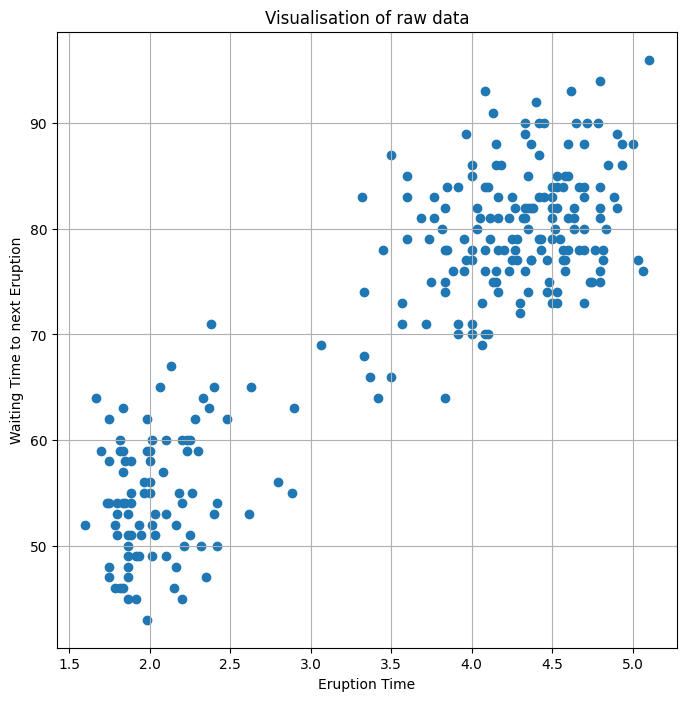

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel("Eruption Time")
plt.ylabel("Waiting Time to next Eruption")
plt.title("Visualisation of raw data")
plt.grid()

Step 4: Finding the best value of K


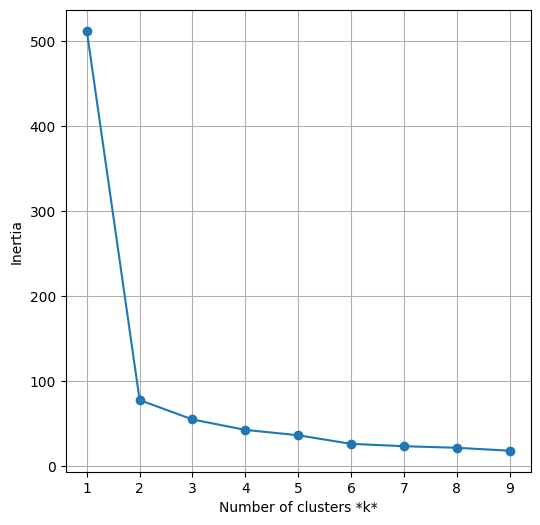

In [ ]:
#we determine the best value of  k by using the elbow plot in k-means
#Elbow plot
#we make the plot between the K value and inertia
inertias = []  # stores the inertia for all values of k
list_k = list(range(1,10))

for k in list_k:
  km = KMeans(n_clusters = k)
  km.fit(X_std)
  inertias.append(km.inertia_)

#plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia')
plt.grid()

we get sudden change at point k=2.so, we choose best value of k as 2

Step 5: Fit the model on df by using the best value of k

[[ 0.70743043  0.67117258]
 [-1.26107164 -1.19643807]]
[0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0]
78.04495748490994


Text(0.5, 1.0, 'Visualisation of clustered data')

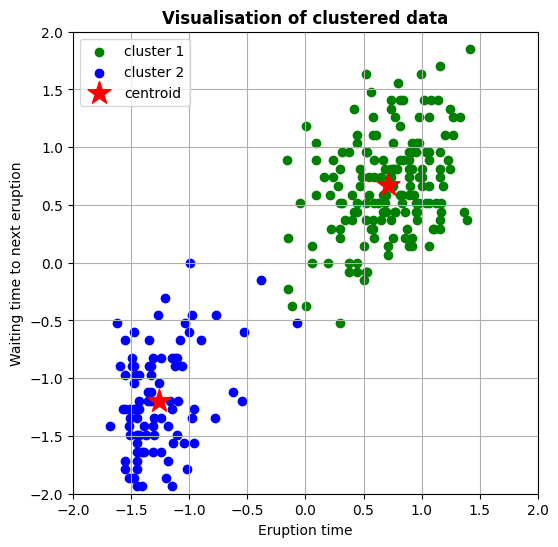

In [ ]:
km = KMeans(n_clusters=2, random_state=42)  #applying k=2
km.fit(X_std)  # fit the data-identify pattern, does everything

centroids = km.cluster_centers_  #final centroid points
print(centroids)
print(km.labels_)
print(km.inertia_)

##plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0],X_std[km.labels_ == 0, 1], c = 'green', label = 'cluster 1')
plt.scatter(X_std[km.labels_ ==  1, 0], X_std[km.labels_ == 1, 1], c = 'blue', label ='cluster 2')
plt.scatter(centroids[:, 0],centroids[:, 1], marker='*', s=300, c='red', label = 'centroid')
plt.legend()
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('Eruption time')
plt.ylabel('Waiting time to next eruption')
plt.grid()
plt.title('Visualisation of clustered data', fontweight='bold')

In [ ]:
df['cluster'] = km.labels_
print(df)

     eruptions  waiting  cluster
0        3.600       79        0
1        1.800       54        1
2        3.333       74        0
3        2.283       62        1
4        4.533       85        0
..         ...      ...      ...
267      4.117       81        0
268      2.150       46        1
269      4.417       90        0
270      1.817       46        1
271      4.467       74        0

[256 rows x 3 columns]


/tmp/ipython-input-1887885631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = km.labels_


In [ ]:
cluster_summary = df.groupby('cluster')[['eruptions','waiting']].mean()
print(cluster_summary)

         eruptions    waiting
cluster                      
0         4.296415  80.097561
1         2.076630  54.956522


In [ ]:
print(df['cluster'].value_counts())

cluster
0    164
1     92
Name: count, dtype: int64


In [ ]:
for cluster in cluster_summary.index:
    eruptions = cluster_summary.loc[cluster, 'eruptions']
    waiting = cluster_summary.loc[cluster, 'waiting']

    print(f"\n🔷 Cluster {cluster} Analysis:")
    print(f"- Avg Eruption: {eruption:.1f} mins")
    print(f"- Avg Waiting Time: {waiting:.1f} mins")

    if eruptions > 3.5:
        print("➡️ Long eruptions: likely more visually impressive.")
    else:
        print("➡️ Short eruptions: occur more frequently.")

    if waiting > 60:
        print("➡️ Longer wait time: needs scheduling or patience.")
    else:
        print("➡️ Short wait time: good for spontaneous viewing.")



🔷 Cluster 0 Analysis:
- Avg Eruption: 2.1 mins
- Avg Waiting Time: 80.1 mins
➡️ Long eruptions: likely more visually impressive.
➡️ Longer wait time: needs scheduling or patience.

🔷 Cluster 1 Analysis:
- Avg Eruption: 2.1 mins
- Avg Waiting Time: 55.0 mins
➡️ Short eruptions: occur more frequently.
➡️ Short wait time: good for spontaneous viewing.
